In [1]:
"""
@author: Shu-wei Huang 
"""
import matplotlib.pyplot as plt
import numpy as np
from numpy import loadtxt

def multivariate_gaussian_pdf(X,MU,SIGMA):
    '''Returns the pdf of a nultivariate gaussian distribution
     X, Mean(MU) are p x 1 vectors
     Covariance(SIGMA) is a p x p matrix
     '''
    # initialize and reshape
    X = X.reshape(-1,1)
    MU = MU.reshape(-1,1)
    p,_ = SIGMA.shape

    # compute values
    SIGMA_inv = np.linalg.inv(SIGMA)
    denominator = np.sqrt((2 * np.pi)**p * np.linalg.det(SIGMA))
    exponent = -(1/2) * ((X - MU).T @ SIGMA_inv @ (X - MU))
    
    # return result
    return float((1. / denominator) * np.exp(exponent) )   

def cal_lr(X,MU1,MU2,SIGMA1,SIGMA2):
    # calculate likelihood ratio
    lr = np.log10(multivariate_gaussian_pdf(X,MU1,SIGMA1)/multivariate_gaussian_pdf(X,MU2,SIGMA2))
    
    # return result
    return float(lr)

In [2]:
'''
#######################
reading from the file
'''
classA_train = loadtxt('classA_train.dat').T

classB_train = loadtxt('classB_train.dat').T

classA_test = loadtxt('classA_test.dat').T

classB_test = loadtxt('classB_test.dat').T

# mean value and covariance
mean_A_train = np.mean(classA_train, axis = 1)
mean_B_train = np.mean(classB_train, axis = 1)
covar_A_train = np.cov(classA_train)
covar_B_train = np.cov(classB_train)

# estimating the parameters
lrA_array = np.array([]);
lrB_array = np.array([]);

In [3]:
'''
use training data to generate likelihood ratio model, and it is tested by 
test data.
'''
for i in range(0,np.size(classA_test,axis=1)):
    
    lr = cal_lr(classA_test[:,i],
                mean_A_train,
                mean_B_train,
                covar_A_train,
                covar_B_train);
    lrA_array = np.append(lrA_array,lr)
    
for i in range(0,np.size(classB_test,axis=1)):
    
    lr = cal_lr(classB_test[:,i],
                mean_A_train,
                mean_B_train,
                covar_A_train,
                covar_B_train);
    lrB_array = np.append(lrB_array,lr)

In [4]:
'''
define a threshold t to scan likelihood ratio 
'''
t = np.linspace(-10, 10, 1000);
pre_A = np.array([]);
pre_B = np.array([]);
all_pre_A = np.array([]);
all_pre_B = np.array([]);

for i in range(0,np.size(t,0)):
    
    for j in range(0,np.size(lrA_array,axis=0)):
        
        if lrA_array[j] >= t[i]:
            pre_A = np.append(pre_A,1)
        else:
            pre_A = np.append(pre_A,0)
    all_pre_A = np.append(all_pre_A,pre_A)
    pre_A = np.array([]);
    for j in range(0,np.size(lrB_array,axis=0)):
        
        if lrB_array[j] < t[i]:
            pre_B = np.append(pre_B,1)
        else:
            pre_B = np.append(pre_B,0)
    all_pre_B = np.append(all_pre_B,pre_B)
    pre_B = np.array([]);

all_pre_A = all_pre_A.reshape(np.size(t,0), np.size(lrA_array,axis=0)).T
all_pre_B = all_pre_B.reshape(np.size(t,0), np.size(lrB_array,axis=0)).T


(0, 1.01)

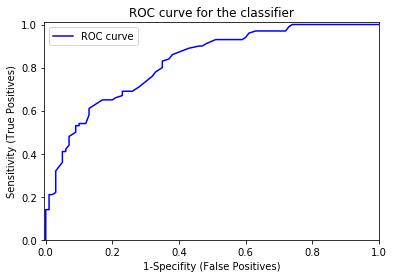

In [5]:
'''
calculate True and False positives
'''
TP_array = np.array([]);
TN_array = np.array([]);

for i in range(0,np.size(t,0)):
    TP = np.sum(all_pre_A[:,i])/np.size(classA_test,axis=1)
    TN = np.sum(all_pre_B[:,i])/np.size(classB_test,axis=1)
    TP_array = np.append(TP_array,TP)
    TN_array = np.append(TN_array,TN)

plt.figure
plt.plot(1-TN_array,TP_array, color="blue", label='ROC curve');
# plt.plot([0,1],[0,1])
# plt.plot([0,1],[1,0])
plt.title("ROC curve for the classifier");
plt.xlabel("1-Specifity (False Positives)")
plt.ylabel("Sensitivity (True Positives)")
plt.legend()
plt.xlim(-0.005, 1)
plt.ylim(0, 1.01)
# plt.axis('equal',adjustable='box')
